In [42]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df_crop = pd.read_csv('/content/drive/MyDrive/datasets/nasachallenge/India Agriculture Crop Production.csv')
bengaluru_rain_df = pd.read_csv('/content/drive/MyDrive/datasets/nasachallenge/bangalore-rainfall-data-1900-2023-aug.csv')

In [45]:
df_crop.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


# **Data Preprocessing**

In [46]:
#filtering the dataset for farming areas around bengaluru

bengaluru_crop_df = df_crop[df_crop['District'].str.contains('Bengaluru', case=False, na=False)]

bengaluru_crop_df.head()


,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
14617,Karnataka,BENGALURU URBAN,Arecanut,2001-02,Whole Year,81.0,Hectare,113.0,Tonnes,1.395062
14618,Karnataka,BENGALURU URBAN,Arecanut,2003-04,Whole Year,216.0,Hectare,302.0,Tonnes,1.398148
14664,Karnataka,BENGALURU URBAN,Arhar/Tur,2001-02,Kharif,553.0,Hectare,169.0,Tonnes,0.305606
14665,Karnataka,BENGALURU URBAN,Arhar/Tur,2002-03,Kharif,319.0,Hectare,149.0,Tonnes,0.467085
14666,Karnataka,BENGALURU URBAN,Arhar/Tur,2003-04,Kharif,843.0,Hectare,316.0,Tonnes,0.374852


In [47]:
#converting the year column to a single numeric year

bengaluru_crop_df['Year'] = bengaluru_crop_df['Year'].str.split('-').str[0].astype(int)


<ipython-input-47-9fd841c7edca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bengaluru_crop_df['Year'] = bengaluru_crop_df['Year'].str.split('-').str[0].astype(int)


In [48]:
#converting the year column to non object

bengaluru_rain_df['Year'] = pd.to_numeric(bengaluru_rain_df['Year'], errors='coerce')


In [49]:
# merging both datasets using the year column

# Convert 'Year' column in bengaluru_rain_df to integer
bengaluru_rain_df['Year'] = pd.to_numeric(bengaluru_rain_df['Year'], errors='coerce')

# Merge the two dataframes on the 'Year' column
merged_df = pd.merge(bengaluru_crop_df, bengaluru_rain_df, on='Year', how='inner')

# Display the merged dataframe
print(merged_df)


         State         District       Crop  Year      Season   Area  \
0    Karnataka  BENGALURU URBAN   Arecanut  2001  Whole Year   81.0   
1    Karnataka  BENGALURU URBAN   Arecanut  2003  Whole Year  216.0   
2    Karnataka  BENGALURU URBAN  Arhar/Tur  2001      Kharif  553.0   
3    Karnataka  BENGALURU URBAN  Arhar/Tur  2002      Kharif  319.0   
4    Karnataka  BENGALURU URBAN  Arhar/Tur  2003      Kharif  843.0   
..         ...              ...        ...   ...         ...    ...   
873  Karnataka  BENGALURU URBAN  Sunflower  1999      Summer    2.0   
874  Karnataka  BENGALURU URBAN  Sunflower  2000      Kharif   10.0   
875  Karnataka  BENGALURU URBAN   Turmeric  1997  Whole Year   54.0   
876  Karnataka  BENGALURU URBAN       Urad  1999      Kharif  116.0   
877  Karnataka  BENGALURU URBAN       Urad  2000      Kharif  134.0   

    Area Units  Production Production Units     Yield  ...   June   July  \
0      Hectare       113.0           Tonnes  1.395062  ...   27.4  112.

In [50]:
#find out null values

merged_df.isnull().sum()


,0
State,0
District,0
Crop,0
Year,0
Season,0
Area,0
Area Units,0
Production,9
Production Units,0
Yield,0


In [51]:
#dropping null values as there are very less null values

merged_df.dropna(inplace=True)


In [52]:
#checking shape

print(merged_df.shape)


(869, 25)


In [53]:
#dropping area units and production units as they are not useful

merged_df = merged_df.drop(['Area Units', 'Production Units'], axis=1)


In [54]:
# converting y to 1 and n to 0

merged_df['El NiNo (Y/N)'] = merged_df['El NiNo (Y/N)'].map({'Y': 1, 'N': 0})
merged_df['La Nina (Y/N)'] = merged_df['La Nina (Y/N)'].map({'Y': 1, 'N': 0})


In [55]:
# standardising all numeric values

from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns
numeric_cols = merged_df.select_dtypes(include=np.number).columns.tolist()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected numeric columns
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])



In [56]:
merged_df.describe()

,Year,Area,Production,Yield,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Total,El NiNo (Y/N),La Nina (Y/N)
count,869.000000,869.000000,8.690000e+02,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,0.544095,0.007619,1.534690e-02,0.016684,0.158279,0.155506,0.156063,0.211784,0.535024,0.453852,0.373128,0.325768,0.333573,0.378330,0.220141,0.182755,0.392775,0.211738,0.177215
std,0.297303,0.043498,1.012527e-01,0.107140,0.276786,0.315235,0.231464,0.233638,0.220435,0.306851,0.239053,0.267390,0.245836,0.265647,0.239142,0.213933,0.249728,0.408775,0.382071
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.000101,8.641240e-07,0.000048,0.000000,0.000000,0.001733,0.052063,0.356608,0.274307,0.289530,0.146107,0.153639,0.165017,0.066463,0.034713,0.161087,0.000000,0.000000
50%,0.590909,0.000503,6.185084e-06,0.000111,0.011111,0.003448,0.040728,0.122857,0.562760,0.372080,0.324429,0.277049,0.322206,0.364787,0.156324,0.121495,0.378744,0.000000,0.000000
75%,0.818182,0.002548,3.015069e-05,0.000328,0.088889,0.075862,0.231369,0.273651,0.622195,0.655622,0.491598,0.436862,0.450135,0.458918,0.221431,0.260347,0.526477,0.000000,0.000000
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Data Visualizations**

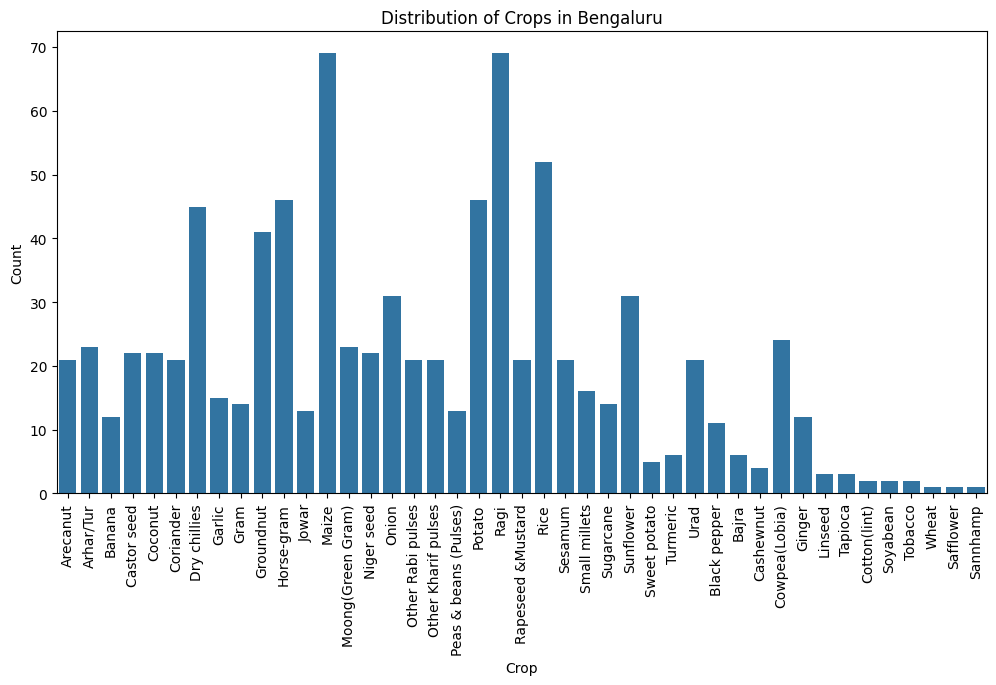

In [57]:
# Visualize the distribution of different crops
plt.figure(figsize=(12, 6))
sns.countplot(x='Crop', data=merged_df)
plt.title('Distribution of Crops in Bengaluru')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [58]:
# Filtering out 'Coconut' crop as it is acting as an outlier
merged_df = merged_df[merged_df['Crop'] != 'Coconut']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


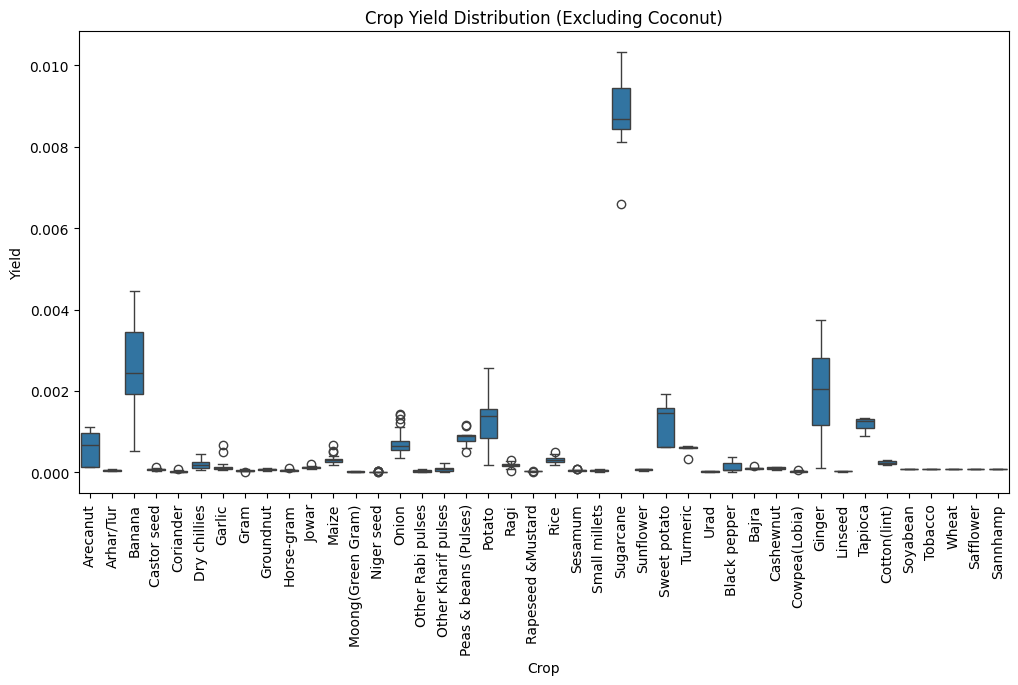

In [59]:
# Visualize the relationship between crops and yield (excluding Coconut)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='Yield', data=merged_df)
plt.title('Crop Yield Distribution (Excluding Coconut)')
plt.xlabel('Crop')
plt.ylabel('Yield')
plt.xticks(rotation=90)
plt.show()


In [60]:
# Label encoding for binary categories
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


merged_df['El NiNo'] = label_encoder.fit_transform(merged_df['El NiNo (Y/N)'])
merged_df['La Nina'] = label_encoder.fit_transform(merged_df['La Nina (Y/N)'])






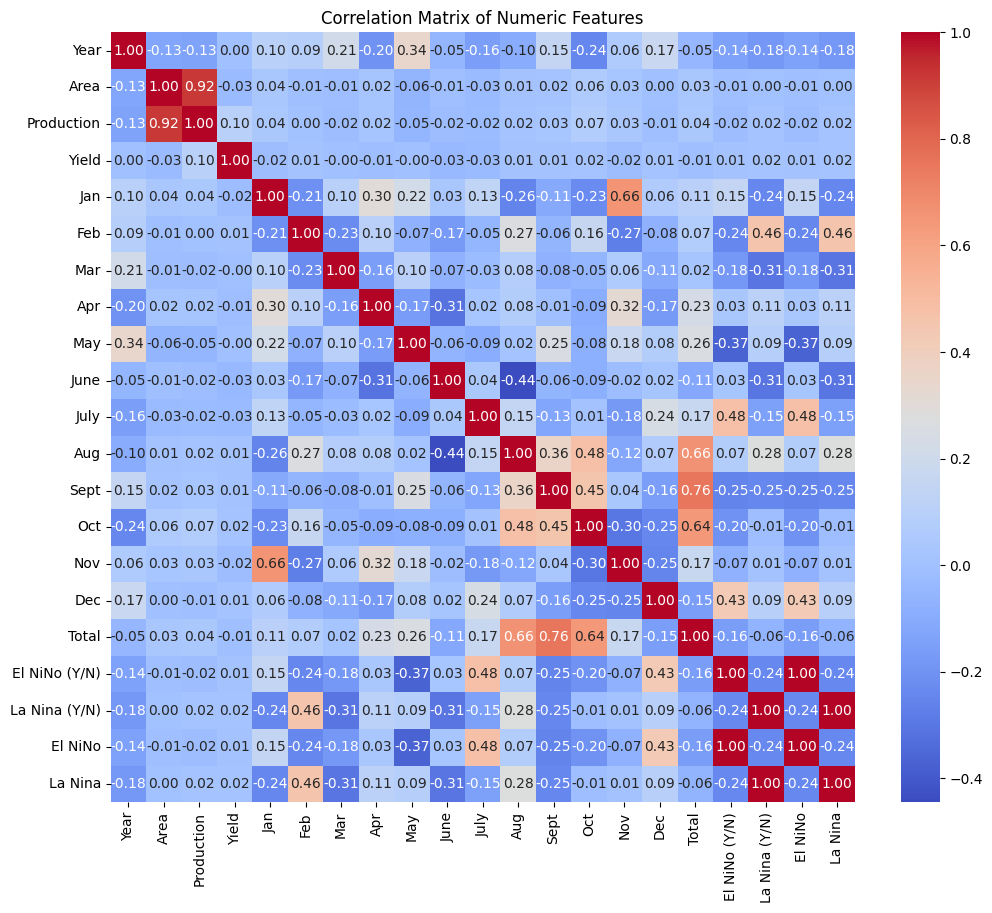

In [61]:
#correlation matrix of all numeric values

numeric_cols = merged_df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = merged_df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [62]:
merged_df.describe()

,Year,Area,Production,Yield,Jan,Feb,Mar,Apr,May,June,...,Aug,Sept,Oct,Nov,Dec,Total,El NiNo (Y/N),La Nina (Y/N),El NiNo,La Nina
count,847.000000,847.000000,8.470000e+02,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,...,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,0.544650,0.007480,1.325775e-04,0.000455,0.158678,0.155502,0.156082,0.211523,0.535128,0.453643,...,0.325764,0.333876,0.378479,0.220627,0.182819,0.392920,0.211334,0.177096,0.211334,0.177096
std,0.297511,0.044047,7.031679e-04,0.001222,0.277048,0.315307,0.231150,0.233329,0.220306,0.306857,...,0.267162,0.245987,0.265859,0.239456,0.213844,0.249835,0.408496,0.381975,0.408496,0.381975
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.000101,7.789886e-07,0.000046,0.000000,0.000000,0.001733,0.052063,0.356608,0.274307,...,0.146107,0.153639,0.165017,0.066463,0.034713,0.161087,0.000000,0.000000,0.000000,0.000000
50%,0.590909,0.000464,5.801975e-06,0.000105,0.011111,0.003448,0.040728,0.122857,0.562760,0.372080,...,0.277049,0.322206,0.364787,0.156324,0.121495,0.378744,0.000000,0.000000,0.000000,0.000000
75%,0.818182,0.002261,2.457432e-05,0.000313,0.133333,0.075862,0.231369,0.273651,0.622195,0.655622,...,0.436862,0.450135,0.458918,0.221431,0.260347,0.526477,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.318199e-02,0.010316,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Modeling**

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score


In [64]:
# Features and target for crop recommendation
features = ['Area', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Total', 'El NiNo', 'La Nina']
X = merged_df[features]

In [65]:
y_crop = label_encoder.fit_transform(merged_df['Crop'])
# Split the data
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X, y_crop, test_size=0.2, random_state=42)

# Initialize and train XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train_crop, y_train_crop)

# Predict and evaluate crop type
y_pred_crop = xgb_classifier.predict(X_test_crop)
crop_accuracy = accuracy_score(y_test_crop, y_pred_crop)
print(f'Crop Type Prediction Accuracy with XGBoost: {crop_accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:59:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Crop Type Prediction Accuracy with XGBoost: 0.09


accuracy is very low as the data for each crop is insufficient for the model to understand

In [66]:
# Yield Prediction
y_yield = merged_df['Yield']

# Split the data for yield prediction
X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(X, y_yield, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_yield, y_train_yield)

# Predict and evaluate yield
y_pred_yield = rf_regressor.predict(X_test_yield)
yield_mse = mean_squared_error(y_test_yield, y_pred_yield)
yield_rmse = np.sqrt(yield_mse)
print(f'Yield Prediction RMSE: {yield_rmse:.2f}')

Yield Prediction RMSE: 0.00


In [67]:
def predict_crop_and_yield(area, month_rainfall, el_nino, la_nina):
    # Calculate total rainfall
    total_rainfall = sum(month_rainfall)

    # Prepare input features
    input_features = [[area] + month_rainfall + [total_rainfall, el_nino, la_nina]]

    # Predict crop type
    crop_prediction = xgb_classifier.predict(input_features)

    # Convert index to crop name
    predicted_crop_name = label_encoder.inverse_transform(crop_prediction)[0]  # Use inverse_transform

    # Predict yield
    yield_prediction = rf_regressor.predict(input_features)
    predicted_yield = yield_prediction[0]

    return predicted_crop_name, predicted_yield

# **Sample prediction**

In [68]:
area = 5000  # Area in hectares
el_nino = 0  # No El NiNo
la_nina = 1  # Yes La Nina
month_rainfall = [50, 20, 30, 40, 60, 90, 80, 100, 70, 30, 20, 10]  # Monthly rainfall

# Make prediction
predicted_crop, predicted_yield = predict_crop_and_yield(area, month_rainfall, el_nino, la_nina)
print(f'Predicted Crop: {predicted_crop}, Predicted Yield: {predicted_yield:.2f}')

Predicted Crop: Ragi, Predicted Yield: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
